# Assignment 1

In [1]:
name = "Pole Murali Krishna" 
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
def function(a, b = 2, *args, c = 6 , **kwargs):
    print(f"POsitional argument: a = {a}")
    print(f"positional argument with default: b = {b}")
    print(f"arbitrary positional argument: args = {args}")
    print(f"keyword only argument with default: c = {c}")
    print(f"arbitrary keyword argument: kwargs = {kwargs}")
function(1, 2, 3, 4, 5, c = 200, key1 = "Hello", key2 = "World")

POsitional argument: a = 1
positional argument with default: b = 2
arbitrary positional argument: args = (3, 4, 5)
keyword only argument with default: c = 200
arbitrary keyword argument: kwargs = {'key1': 'Hello', 'key2': 'World'}


## Exercise 1


In [3]:
def is_prime(n):
    """
    Check if the number is prime or not.
    """
    def is_prime_optimized(n):
        if n <= 1:
            return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True
is_prime(2)

True

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [4]:
'''import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and print the following data: 
    the name of the analyzed function, 
    the name of all the arguments it takes 
    and their types (positional, keyword, etc.)
    """
    if not callable(func):
        raise ValueError("The provided objec is not a callable function")
    func_name = func.__name__
    print(f"Function name: {func_name}")
    signature = inspect.signature(func)
    print("argumeny:")
    for param in signature.parameters.values():
        print(f" Name: {param.name}")
        print(f" Type: {param.kind}")
        if param.default != inspect.Parameter.empty:
            print(f" Default Value: {param.default}")
        print()
def my_function(a, b=10, *args, c=20, **kwargs):
    pass
inspect_function(my_function)'''
import inspect
def inspect_function(func):
    if not callable(func):
        raise ValueError("Objec is not callable function")
    func_name = func.__name__
    print(f"Function Name: {func_name}")
    signature = inspect.signature(func)
    print("Arguments")
    for param in signature.parameters.values():
        print(f" NAme: {param.name}")
        print(f" type: {param.kind}")
        if param.default != inspect.Parameter.empty:
            print(f" Default value: {param.default}")
        print()
def my_function(a, b = 10, *args, c = 20, **kwargs):
        pass
inspect_function(my_function)

Function Name: my_function
Arguments
 NAme: a
 type: POSITIONAL_OR_KEYWORD

 NAme: b
 type: POSITIONAL_OR_KEYWORD
 Default value: 10

 NAme: args
 type: VAR_POSITIONAL

 NAme: c
 type: KEYWORD_ONLY
 Default value: 20

 NAme: kwargs
 type: VAR_KEYWORD



## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [5]:
from datetime import datetime
from time import sleep
 
def my_time_now(msg, *, dt = None):
    if dt is None:
        dt = datetime.now()
    print(msg, dt)

In [6]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-17 14:25:44.191382
The time is now:  2024-12-17 14:25:45.203636
The time is now:  2024-12-17 14:25:46.212417


## Exercise 4

In [7]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    # your code here    
    count = 0
    for value in input_generator:
        if count >= max_count:
            break 
        yield value
        count += 1

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [8]:
def pascal_triangle():
    row = [1]
    while True:
        for value in row:
            yield value
        row = [1] + [row[i] + row[i + 1] for i in range(len(row) - 1)] + [1]

In [9]:
limited_gen = limit(pascal_triangle(), 55)
output = [num for num in limited_gen]
print(" ".join(map(str, output)))

1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1


## Exercise 6


In [10]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """
    path = pathlib.Path(path_to_dir)
    files = [f for f in path.iterdir() if f.is_file()]
    files.sort(key=lambda f: (f.stat().st_size, f.name))
    return files
sorted_files = files_sorted_by_size(r'C:\Users\krish\Desktop\Syllabus\Semester_1\Python_Now\Assignments\Assignment_0')
for file in sorted_files:
    print(file.name, file.stat().st_size)

assignment_1.ipynb 20007


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [11]:
def merge_sorter(*args):
    iterators = [iter(seq) for seq in args]
    current_val = [next(it, None) for it in iterators]
    while any(val is not None for val in current_val):
        min_val = None
        min_index = -1
        for i, val in enumerate (current_val):
            if val is not None and (min_val is None or val < min_val):
                min_val = val
                min_index = i
        yield min_val
        current_val[min_index] = next(iterators[min_index], None)
s = [1, 3, 5]
s1 = [2, 4, 6]
merged = merge_sorter(s, s1)
print(list(merged))

[1, 2, 3, 4, 5, 6]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [12]:
import time

def profiler():
    # your code here
    def decorator(func):
        func.last_time_taken = 0
        func.calls = 0
        def wrapper(*args, **kwargs):
            func.calls += 1
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            func.last_time_taken = end_time - start_time
            return result
        return wrapper
    return decorator
    # your code here
@profiler()
def ackermann(m, n):
    if m == 0:
        return n + 1
    elif m > 0 and n == 0:
        return ackermann(m - 1, 1)
    else:
        return ackermann(m - 1, ackermann(m, n - 1))

ackermann.last_time_taken = 0
ackermann.calls = 0
result = ackermann(3, 2)
print("ackermann result:", result)
print("execution time:", ackermann.last_time_taken, "seconds")
print("recursive calls:", ackermann.calls)


ackermann result: 29
execution time: 0 seconds
recursive calls: 0


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [13]:
def encode(sequence):
    # your code here
    if not sequence:
        return []
    result = []
    current_character = sequence[0]
    count = 1
    for character in sequence[1:]:
        if character == current_character:
            count += 1
        else:
            result.append((current_character, count))
            current_character = character
            count = 1
    result.append((current_character, count))
    return result

print(encode("aaabbcaa"))
print(encode("aaa"))
print(encode(""))
print(encode("aabbaa"))

[('a', 3), ('b', 2), ('c', 1), ('a', 2)]
[('a', 3)]
[]
[('a', 2), ('b', 2), ('a', 2)]


## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
def fibonacci(n):
    if n == 0 or n == 1:
        return n 
    return fibonacci(n-1) + fibonacci(n-2)

Fibonacci Result: 5


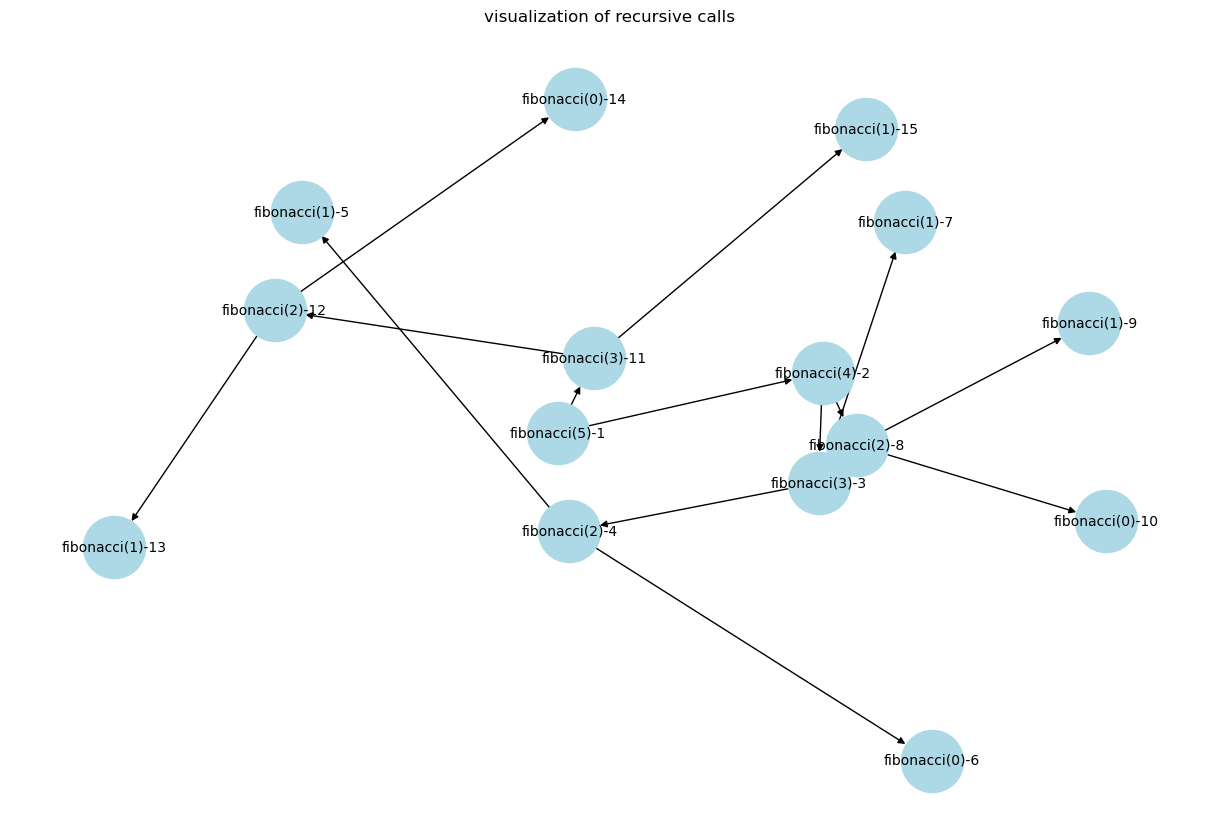

In [24]:
def visualizer(func):
    # your code here
    def wrapper(n, parent=None):
        call_id[0] += 1
        current = f"{func.__name__}({n})-{call_id[0]}"
        graph.add_node(current)
        if parent:
            graph.add_edge(parent, current)
        if n == 0 or n == 1:
            return n
        left_result = wrapper(n - 1, current)
        right_result = wrapper(n - 2, current)
        return left_result + right_result
    def plot_graph():
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(graph, k=0.8)
        nx.draw(graph, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
        plt.title("visualization of recursive calls")
        plt.show()
    wrapper.plot_graph = plot_graph
    graph = nx.DiGraph()
    call_id = [0]
    return wrapper
fibonacci = visualizer(fibonacci)
n = 5
print("Fibonacci Result:", fibonacci(n))
fibonacci.plot_graph()

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [26]:
def memoizer(func):
    # your code here
    cache = {}
    def wrapper(*args):
        if args in cache:
            print(f"Cache hit for arguments {args}")
            return cache[args]
        print(f"Cache miss for arguments {args}") 
        result = func(*args)
        cache[args] = result
        return result
    return wrapper
@memoizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)
print("Fibonacci(10):", fibonacci(10))
print("Fibonacci(8):", fibonacci(8)) 
print("Fibonacci(10):", fibonacci(10))

Cache miss for arguments (10,)
Cache miss for arguments (9,)
Cache miss for arguments (8,)
Cache miss for arguments (7,)
Cache miss for arguments (6,)
Cache miss for arguments (5,)
Cache miss for arguments (4,)
Cache miss for arguments (3,)
Cache miss for arguments (2,)
Cache miss for arguments (1,)
Cache miss for arguments (0,)
Cache hit for arguments (1,)
Cache hit for arguments (2,)
Cache hit for arguments (3,)
Cache hit for arguments (4,)
Cache hit for arguments (5,)
Cache hit for arguments (6,)
Cache hit for arguments (7,)
Cache hit for arguments (8,)
Fibonacci(10): 55
Cache hit for arguments (8,)
Fibonacci(8): 21
Cache hit for arguments (10,)
Fibonacci(10): 55


## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

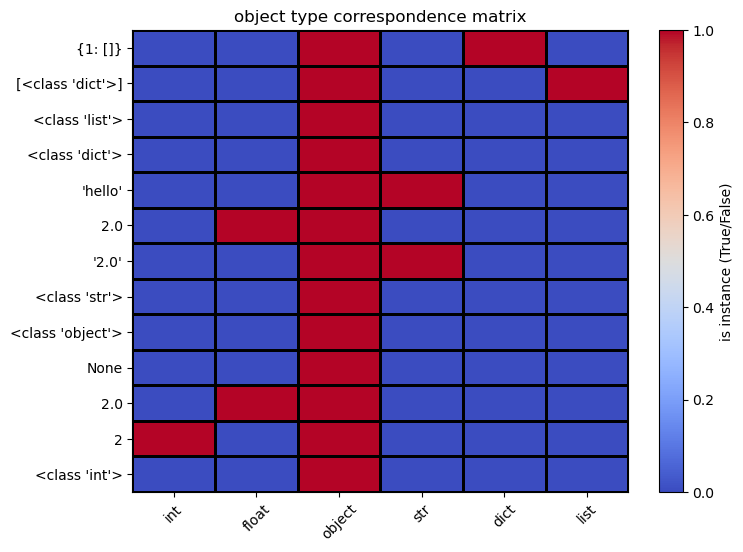

In [28]:
import numpy as np
import matplotlib.pyplot as plt
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

rows = len(list_of_objects)
cols = len(list_of_types)
correspondence_matrix = np.zeros((rows, cols), dtype=bool)
for i, obj in enumerate(list_of_objects):
    for j, typ in enumerate(list_of_types):
        correspondence_matrix[i][j] = isinstance(obj, typ)
plt.figure(figsize=(8, 6))
plt.pcolormesh(correspondence_matrix, cmap='coolwarm', edgecolors='k', linewidth=1)
plt.xticks(np.arange(len(list_of_types)) + 0.5, [t.__name__ for t in list_of_types], rotation=45)
plt.yticks(np.arange(len(list_of_objects)) + 0.5, [repr(obj) for obj in list_of_objects])
plt.colorbar(label="is instance (True/False)")
plt.title("object type correspondence matrix")
plt.show()